# <code>Bibliotecas<code>

In [1]:
import pandas as pd
from random import randint
CASO_PROMEDIO = pd.read_csv("./data.csv")
import matplotlib.pyplot as plt
TESTS = 100

# <code>Clases<code>

In [2]:
from dataclasses import dataclass
from turtle import pos, position
class Music:
    def __init__(self,data) -> None:
        self.trackName = data[0]
        self.artist = data[1]
        self.album = data[2]
        self.isrc = data[3]
        self.duration = data[4]
        self.year = data[5]
        self.month = data[6]
        self.day = data[7]
    def __repr__(self) -> str:
        str = ""
        # str += f"Track Name: {self.trackName}\n"
        # str+= f"\tArtist: {self.artist}\n"
        # str+= f"\tAlbum: {self.album}\n"
        str+= f"\tIsrc: {self.isrc}\n"
        # str+= f"\tDuration(min): {self.duration}\n"
        # str+= f"\tDate: {self.year}/{self.month}/{self.day}\n"
        return str







@dataclass
class Search():
    attr:str=""
    cont:int=0


    def I_busquedaLinea(self,lista,llave):
        i = 0
        while i<len(lista):
            self.cont+=1
            if(llave==getattr(lista[i],self.attr)):
                return i
            i+=1
        return -1

    def R_busquedaLineal(self,lista,llave,i):
        self.cont+=1
        if(i<len(lista)):
            if(llave==getattr(lista[i],self.attr)): 
                return i
            return self.R_busquedaLineal(lista,llave,i+1)
        return -1
    


    def I_binaria(self,lista,llave):
        l = 0
        r = len(lista)-1
        index = -1
        found = False
        while found == False and l<=r:
            self.cont+=1
            m = (r+l) // 2
            cmp = getattr(lista[m],self.attr)
            1+1
            if llave==cmp:
                found = True
                index = m
            elif cmp > llave:
                r = m - 1
            else:
                l = m + 1
        return index



    def R_binaria(self,lista,llave,l,r,index=-1):
        if l<=r:
            m=(r+l) // 2
            cmp = getattr(lista[m],self.attr)
            if llave == cmp:
                index = m
            elif cmp > llave:
                return self.R_binaria(lista,llave,l,m-1,index)
            else:
                return self.R_binaria(lista,llave,m+1,r,index)
        return index







@dataclass
class Sort:
    attr:str=""
    cont:int=0

    
    def burbuja(self,lista): 
        arreglo = len(lista) 
        i = 0
        while i < len(lista):         
            j=0
            while j < len(lista)-1: 
                self.cont+=1 
                if getattr(lista[j],self.attr) > getattr(lista[j + 1],self.attr):      
                    temp = lista[j]      
                    lista[j] = lista[j+1]      
                    lista[j+1] = temp
                j+=1 
            i+=1     

    def CrearSubArreglo(self,A,indIzq,indDer):
        return A[indIzq:indDer+1]

    def Merge(self,A,p,q,r):
        Izq = self.CrearSubArreglo(A,p,q)                  
        Der = self.CrearSubArreglo(A,q+1,r)               
        i = 0    
        j = 0    
        for k in range(p,r+1):    
            self.cont+=1                                    
            if(j >= len(Der)) or (i < len(Izq) and getattr(Izq[i],self.attr) < getattr(Der[j],self.attr)):    
                A[k] = Izq[i]                                           
                i = i + 1                                               
            else:                                                       
                A[k] = Der[j]                                            
                j = j + 1
                
    def MergeSort(self,A,p,r):
        self.cont+=1                                    
        if r - p > 0:             
            q = int((r+p) / 2)      
            self.MergeSort(A,p,q)        
            self.MergeSort(A,q+1,r)      
            self.Merge(A,p,q,r)          

# <code>Funciones<code>

In [3]:
def obtenerDatos(db:pd.DataFrame,len):
    return [Music(list(db.iloc[i])) for i in range(len)]

# <code>Variables Globales<code>

In [4]:
search = Search()
sort = Sort()

# Busqueda lineal Iterativa
## Analisis Temporal
### Mejor Caso de Complejidad
El nodo buscado es el primero en el conjunto

Text(0.5, 1.0, 'Mejor Caso de Complejidad')

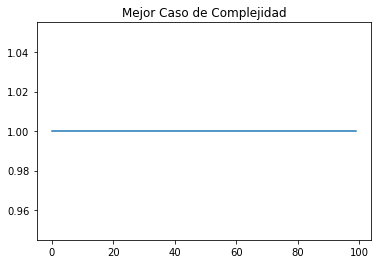

In [5]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[0]
    search.cont=0
    search.I_busquedaLinea(tt,nodo.duration)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")


### Peor Caso de Complejidad
no existe el nodo

Text(0.5, 1.0, 'Peor Caso de Complejidad')

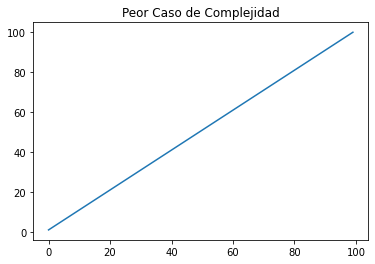

In [6]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    search.cont=0
    search.I_busquedaLinea(tt,301)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")

Las caidas son porque encuentra un elemento con la misma llave pero antes

### Caso Promedio de Complejidad
Calquiera del elemento

Text(0.5, 1.0, 'Caso Promedio de Complejidad')

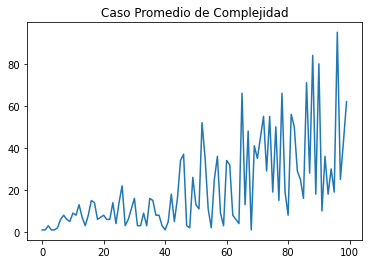

In [7]:


X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    index = randint(0,i)
    nodo = tt[index]
    search.cont=0
    search.I_busquedaLinea(tt,nodo.duration)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")

# Busqueda Lineal Recursiva
## Analisis Temporal
### Mejor Caso de Complejidad

Text(0.5, 1.0, 'Mejor Caso de Complejidad')

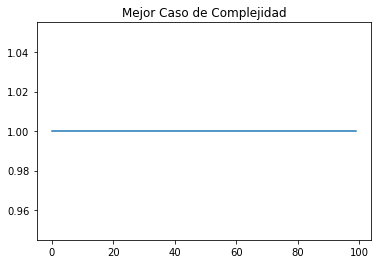

In [8]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[0]
    search.cont=0
    search.R_busquedaLineal(tt,nodo.trackName,0)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")

### Pear Caso de Complejidad

Text(0.5, 1.0, 'Peor Caso de Complejidad')

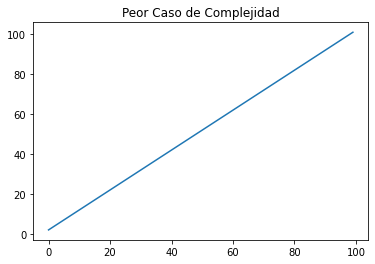

In [9]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    search.cont=0
    search.R_busquedaLineal(tt,"·",0)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")

### Caso Promedio de Complejidad

Text(0.5, 1.0, 'Caso promedio de Complejidad')

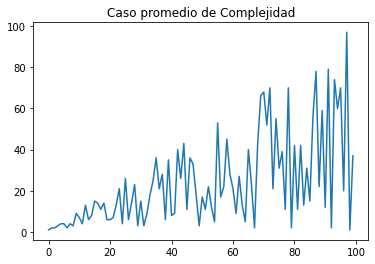

In [10]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    index = randint(0,i)
    nodo = tt[index]
    search.cont=0
    search.R_busquedaLineal(tt,nodo.trackName,0)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Caso promedio de Complejidad")

# Busqueda Binaria Iterativa con ordenamiento $\mathcal{O}(n^2)$
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad
El elemento justo esta en el medio

Text(0.5, 1.0, 'Mejor Caso de Complejidad')

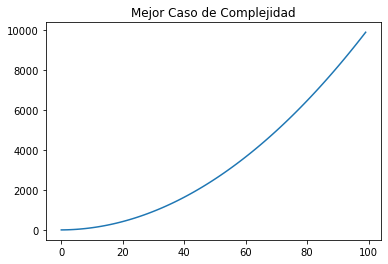

In [11]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.burbuja(tt)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    search.I_binaria(tt,nodo.isrc)
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")

### Peor Caso de Complejidad
No existe y su indice valor es mayor al mayor del conjunto o menor al de todo el conjunto

Text(0.5, 1.0, 'Peor Caso de Complejidad')

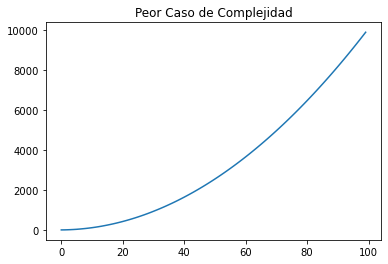

In [12]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    indi.append(search.I_binaria(tt,'$'))
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")

### Caso Promedio de Complejidad

Text(0.5, 1.0, 'Caso promedio de Complejidad')

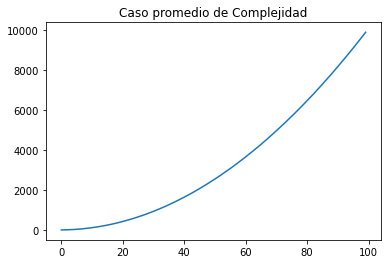

In [13]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[randint(0,len(tt)-1)]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    indi.append(search.I_binaria(tt,nodo.isrc))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Caso promedio de Complejidad")

# Busqueda Binaria Iterativa con ordenamiento $\mathcal{O}(n \log_2(n)$
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad

Text(0.5, 1.0, 'Mejor Caso Complejidad')

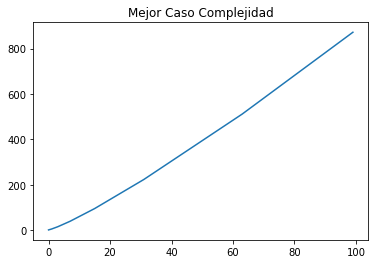

In [14]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    indi.append(search.I_binaria(tt,nodo.isrc))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Mejor Caso Complejidad")

### Peor Caso de Complejidad

Text(0.5, 1.0, 'Peor Caso Complejidad')

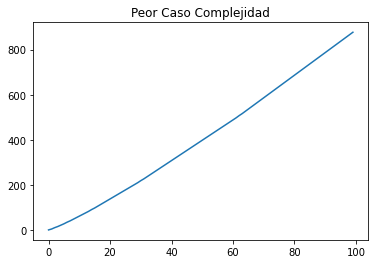

In [15]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    indi.append(search.I_binaria(tt,"$"))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Peor Caso Complejidad")

### Caso Promedio de Complejidad

Text(0.5, 1.0, 'Caso Promedio de Complejidad')

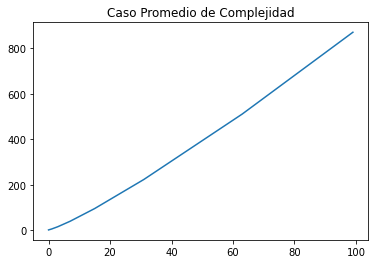

In [16]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    nodo = tt[randint(0,len(tt)-1)]
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")

# Busqueda Binaria Recursiva con ordenamiento $\mathcal{O}(n^2)$
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad

Text(0.5, 1.0, 'Mejor Caso de Complejidad')

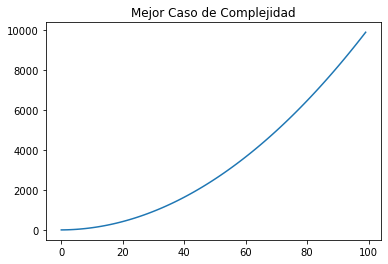

In [17]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.burbuja(tt)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")

### Peor Caso de Complejidad

Text(0.5, 1.0, 'Peor Caso de Complejidad')

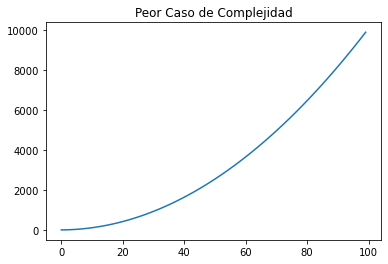

In [18]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    indi.append(search.R_binaria(tt,'$',0,len(tt)-1))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")

### Caso Promedio de Complejidad

Text(0.5, 1.0, 'Caso Promedio de Complejidad')

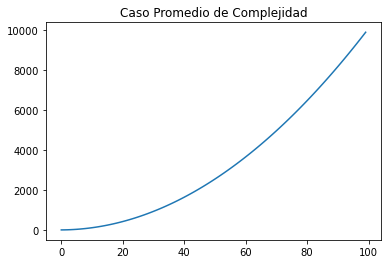

In [19]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[randint(0,len(tt)-1)]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    index  =search.R_binaria(tt,nodo.isrc,0,len(tt)-1)
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")

# Busqueda Binaria Recursiva con ordenamiento $\mathcal{O}(n \log_2(n))$
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad

Text(0.5, 1.0, 'Mejor Caso de Complejidad')

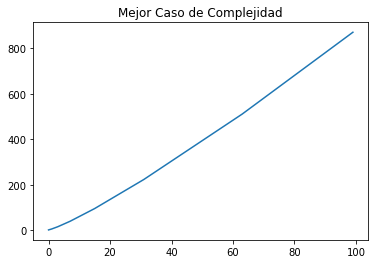

In [20]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")

### Peor Caso de Complejidad 

Text(0.5, 1.0, 'Peor Caso de Complejidad')

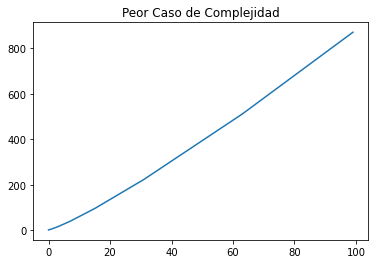

In [21]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    indi.append(search.R_binaria(tt,"$",0,len(tt)-1))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")

### Caso Promedio de Complejidad

Text(0.5, 1.0, 'Caso Promedio de Complejidad')

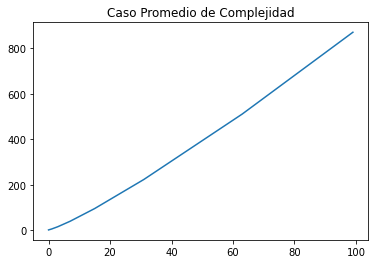

In [22]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    nodo = tt[randint(0,len(tt)-1)]
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    search.R_binaria(tt,nodo.isrc,0,len(tt)-1)
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")